# Assignment 1
### Benjamin Tollison
### To-Do
- [x] Create all the equally spaced nodes
  - [x]  dx,dy apart depending on the mesh size
  - [x]  plot the intial mesh
- [x] Create the connectivity matrix 
  - [x] checker for duplicates
  - [x] dont add duplicates
- [ ] Create the Applied Force Matrix
- [ ] fix all the nodes on the left with reaction forces
- [ ] Solve for the Force densities and Reaction Matrix
### Try to accomplish this with Tensorflow/PyTorch

### Setting up the Problem

(3, 81)
(3, 81)
(3, 81)


Expression(AFFINE, UNKNOWN, (3, 81))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80]
Member force densities:


,0
0,-2.609228e+00
1,3.836637e-14
2,-2.159643e+00
3,-2.042766e+00
4,-3.657718e-01
...,...
267,1.504878e+00
268,1.113955e+00
269,6.727905e-01
270,3.024408e-01


Reaction Matrix


,0,1,2
0,2.384436e+00,2.699554e-01,0.0
1,-1.598059e-11,-5.774339e-11,0.0
2,-2.756334e-11,-1.008066e-10,0.0
3,-3.676827e-11,-1.456460e-10,0.0
4,-4.410234e-11,-1.937183e-10,0.0
...,...,...,...
76,4.410234e-11,-1.937183e-10,0.0
77,4.958872e-11,-2.457319e-10,0.0
78,5.329525e-11,-3.010468e-10,0.0
79,5.541432e-11,-3.583949e-10,0.0


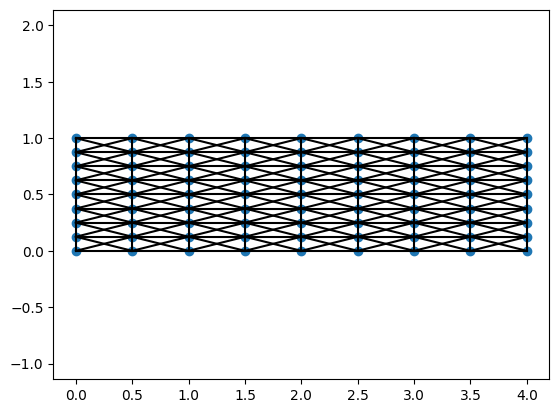

In [2]:
### Benjamin Tollison ###
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def PlotSturcture(N,C):
    m,n = C.shape
    for i in range(m):
        ii = np.nonzero(C[i])
        plt.plot(N[0,ii][0],N[1,ii][0],'k')
        plt.axis('equal')
def DistanceChecker(x1,y1,x2,y2):
  x_coords = np.linspace(0, length, int(np.sqrt(number_of_nodes)))
  y_coords = np.linspace(0, height, int(np.sqrt(number_of_nodes)))
  dx,dy = abs(x_coords[1]),abs(y_coords[1])
  distance_between_x = abs(x1 - x2)
  distance_between_y = abs(y1 - y2)
  if distance_between_x < dx + dx/10 and distance_between_y < dy + dy/10:
     return True
  else:
     return False
def is_repeat_pattern(patterns, new_pattern):
    new_tuple = tuple(new_pattern)
    seen_tuples = set(map(tuple, patterns))
    if new_tuple in seen_tuples:
        return True
    else:
        return False
def BuildConnectivityMatrix(number_of_members,number_of_nodes,cooridnate_matrix):
  C = np.zeros((number_of_members,number_of_nodes))
  C_duplicate = []
  member = 0
  for node in range(number_of_nodes-1):
    for other_node in range(1,number_of_nodes):
      predetermined_indices = [node,other_node]  # Indices where you want to put 1s
      duplicate_check_tuple= tuple(1 if i in predetermined_indices else 0 for i in range(number_of_nodes))
      if is_repeat_pattern(C_duplicate,duplicate_check_tuple):
          duplicate_check_bool = False
      else:
          duplicate_check_bool = True
          C_duplicate.append(duplicate_check_tuple)
      node_x1,node_y1 = cooridnate_matrix[0][node], cooridnate_matrix[1][node]
      node_x2,node_y2 = cooridnate_matrix[0][other_node], cooridnate_matrix[1][other_node]
      if other_node != node and DistanceChecker(node_x1,node_y1,node_x2,node_y2) and duplicate_check_bool and member < number_of_members:
        C[member][node], C[member][other_node] = 1, -1
        member += 1
  return C
length = 4
height = 1
number_of_nodes = 9**2
number_of_nodes = int(np.sqrt(number_of_nodes))**2 # mesh gets rounded to nearest perfect square
x_coords = np.linspace(0, length, int(np.sqrt(number_of_nodes)))
y_coords = np.linspace(0, height, int(np.sqrt(number_of_nodes)))
X, Y = np.meshgrid(x_coords, y_coords)
N = np.vstack((X.ravel(), Y.ravel(), np.zeros(X.size)))
b_i = np.array([i for i in range(number_of_nodes)])
s_i = b_i
# Geometry work for number of members done on hand paper. I will include my geometrical proof at the end
number_of_members = int(6 + 5*(np.sqrt(number_of_nodes)-2) + (np.sqrt(number_of_nodes)-2)*(5+4*(np.sqrt(number_of_nodes)-2)))
C_B = BuildConnectivityMatrix(number_of_members,number_of_nodes,N)
C_S = BuildConnectivityMatrix(number_of_members,number_of_nodes,N)
plt.scatter(N[0],N[1])
PlotSturcture(N,C_B)
R = cp.Variable((3,number_of_nodes))
sigma_B = cp.Variable(number_of_members)
sigma_S = cp.Variable(number_of_members)
free_nodes = np.where(N[0] != 0.0)[0]
F_ext = np.zeros((3, number_of_nodes))  # Dimension of Fext should match the number of nodes
far_right_nodes = np.where(N[0] == length)
node_where_F_is_applied = np.argmin(np.abs(N[1][far_right_nodes] - height/2))
P = -1
F_ext[1][far_right_nodes[0][node_where_F_is_applied]] = P
print((N@C_B.T@cp.diag(sigma_B)@C_B).shape)
print(F_ext.shape)
print(R.shape)
display(N@C_B.T@cp.diag(sigma_B)@C_B)
print(list(free_nodes))
Constraints = [N @ C_B.T @ cp.diag(sigma_B) @ C_B - F_ext - R == 0, R[:,free_nodes] == 0]
# Constraints = [N @ C_S.T @ cp.diag(sigma_S) @ C_S- N @ C_B.T @ cp.diag(sigma_B) @ C_B - F_ext - R == 0, R[:, free_nodes] == 0]
Cost = cp.sum_squares(sigma_B)
prob = cp.Problem(cp.Minimize(Cost), Constraints)
prob.solve()
# Print solution
print("Member force densities:")
display(pd.DataFrame(sigma_B.value))
print("Reaction Matrix")
display(pd.DataFrame((R.value).T))